In [ ]:
import pandas as pd

df = pd.read_excel('/content/SpringData2020.xlsx')

In [ ]:

df=df.rename(columns=df.iloc[0])
df=df.drop(df.index[0])


In [ ]:
df.columns.values[0]="Tarih"



In [ ]:
df.isnull().values.any()

True

In [ ]:
def missing_values_table(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return mis_val_table_ren_columns

In [ ]:
missing_values_table(df)

Your selected dataframe has 6 columns.
There are 5 columns that have missing values.


,Missing Values,% of Total Values
NOX ( µg/m³ ),2208,100.0
PM10 ( µg/m³ ),7,0.3
SO2 ( µg/m³ ),1,0.0
CO ( µg/m³ ),1,0.0
NO2 ( µg/m³ ),1,0.0


In [ ]:
df = df.drop(['NOX ( µg/m³ )'], axis=1)
df["SO2 ( µg/m³ )"].fillna( method ='ffill', inplace = True)
df["NO2 ( µg/m³ )"].fillna( method ='ffill', inplace = True)
df["CO ( µg/m³ )"].fillna( method ='ffill', inplace = True)

In [ ]:
df

,Tarih,PM10 ( µg/m³ ),SO2 ( µg/m³ ),CO ( µg/m³ ),NO2 ( µg/m³ )
1,2020-03-01 00:00:56,17.47,3.66,203.79,7.73
2,2020-03-01 01:00:56,11.96,4.26,225.59,7.66
3,2020-03-01 02:00:56,25.56,3.29,224.87,7.74
4,2020-03-01 03:00:56,17.58,2.73,237.86,7.69
5,2020-03-01 04:00:56,35.75,3.22,240.17,7.70
...,...,...,...,...,...
2204,2020-05-31 19:00:56,29.09,4.50,129.89,3.92
2205,2020-05-31 20:00:56,36.97,4.74,128.13,3.93
2206,2020-05-31 21:00:56,24.06,4.52,125.54,3.83
2207,2020-05-31 22:00:56,9.35,4.75,128.38,3.91


In [ ]:
missing_values_table(df)

Your selected dataframe has 5 columns.
There are 1 columns that have missing values.


,Missing Values,% of Total Values
PM10 ( µg/m³ ),7,0.3


In [ ]:
df = df.fillna(df.mean())

In [ ]:
missing_values_table(df)

Your selected dataframe has 5 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [ ]:
df

,Tarih,PM10 ( µg/m³ ),SO2 ( µg/m³ ),CO ( µg/m³ ),NO2 ( µg/m³ )
1,2020-03-01 00:00:56,17.47,3.66,203.79,7.73
2,2020-03-01 01:00:56,11.96,4.26,225.59,7.66
3,2020-03-01 02:00:56,25.56,3.29,224.87,7.74
4,2020-03-01 03:00:56,17.58,2.73,237.86,7.69
5,2020-03-01 04:00:56,35.75,3.22,240.17,7.70
...,...,...,...,...,...
2204,2020-05-31 19:00:56,29.09,4.50,129.89,3.92
2205,2020-05-31 20:00:56,36.97,4.74,128.13,3.93
2206,2020-05-31 21:00:56,24.06,4.52,125.54,3.83
2207,2020-05-31 22:00:56,9.35,4.75,128.38,3.91


In [ ]:
#asdadsadadsasdasdads

import warnings
import itertools
from math import sqrt
from datetime import datetime
from numpy import concatenate
import numpy as np
import pandas as pd
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import LSTM, Bidirectional, GRU
from keras.layers.recurrent import LSTM
from sklearn.utils import shuffle
import plotly.offline as py
import plotly.graph_objs as go
import seaborn as sns
import matplotlib.pyplot as plt

py.init_notebook_mode(connected=True)
plt.style.use('fivethirtyeight')

In [ ]:
df['Tarih'] = pd.to_datetime(df.Tarih, format='%d-%m-%Y')
#İndex'e Alınması
df.index = df.Tarih

In [ ]:
df.Tarih

Tarih
2020-03-01 00:00:56   2020-03-01 00:00:56
2020-03-01 01:00:56   2020-03-01 01:00:56
2020-03-01 02:00:56   2020-03-01 02:00:56
2020-03-01 03:00:56   2020-03-01 03:00:56
2020-03-01 04:00:56   2020-03-01 04:00:56
                              ...        
2020-05-31 19:00:56   2020-05-31 19:00:56
2020-05-31 20:00:56   2020-05-31 20:00:56
2020-05-31 21:00:56   2020-05-31 21:00:56
2020-05-31 22:00:56   2020-05-31 22:00:56
2020-05-31 23:00:56   2020-05-31 23:00:56
Name: Tarih, Length: 2208, dtype: datetime64[ns]

In [ ]:
values = df['PM10 ( µg/m³ )'].values.reshape(-1,1)
values = values.astype('float32')
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(values)

In [ ]:
TRAIN_SIZE = 0.60
train_size = int(len(dataset) * TRAIN_SIZE)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size, :], dataset[train_size:len(dataset), :]
print("Gün Sayıları (training set, test set): " + str((len(train), len(test))))

Gün Sayıları (training set, test set): (1324, 884)


In [ ]:
def create_dataset(dataset, window_size = 1):
    data_X, data_Y = [], []
    for i in range(len(dataset) - window_size - 1):
        a = dataset[i:(i + window_size), 0]
        data_X.append(a)
        data_Y.append(dataset[i + window_size, 0])
    return(np.array(data_X), np.array(data_Y))

In [ ]:
window_size = 1
train_X, train_Y = create_dataset(train, window_size)
test_X, test_Y = create_dataset(test, window_size)
print("Original training data shape:")
print(train_X.shape)
# Yeni verisetinin şekline bakalım.
train_X = np.reshape(train_X, (train_X.shape[0], 1, train_X.shape[1]))
test_X = np.reshape(test_X, (test_X.shape[0], 1, test_X.shape[1]))
print("New training data shape:")
print(train_X.shape)

Original training data shape:
(1322, 1)
New training data shape:
(1322, 1, 1)


In [ ]:
def fit_model(train_X, train_Y, window_size = 1):
    model = Sequential()
    # Modelin tek layerlı şekilde kurulacak.
    model.add(LSTM(100, 
                   input_shape = (1, window_size)))
    model.add(Dense(1))
    model.compile(loss = "mean_squared_error", 
                  optimizer = "adam")
   #30 epoch yani 30 kere verisetine bakılacak.
    model.fit(train_X, 
              train_Y, 
              epochs = 30, 
              batch_size = 1, 
              verbose = 1)
    
    return(model)
# Fit the first model.
model1 = fit_model(train_X, train_Y, window_size)

Epoch 1/30
1322/1322 [==============================] - 3s 2ms/step - loss: 0.0103
Epoch 2/30
1322/1322 [==============================] - 2s 2ms/step - loss: 0.0094
Epoch 3/30
1322/1322 [==============================] - 2s 2ms/step - loss: 0.0093
Epoch 4/30
1322/1322 [==============================] - 2s 2ms/step - loss: 0.0093
Epoch 5/30
1322/1322 [==============================] - 2s 2ms/step - loss: 0.0091
Epoch 6/30
1322/1322 [==============================] - 2s 2ms/step - loss: 0.0091
Epoch 7/30
1322/1322 [==============================] - 2s 2ms/step - loss: 0.0093
Epoch 8/30
1322/1322 [==============================] - 2s 2ms/step - loss: 0.0092
Epoch 9/30
1322/1322 [==============================] - 2s 2ms/step - loss: 0.0093
Epoch 10/30
1322/1322 [==============================] - 2s 2ms/step - loss: 0.0093
Epoch 11/30
1322/1322 [==============================] - 2s 2ms/step - loss: 0.0092
Epoch 12/30
1322/1322 [==============================] - 2s 2ms/step - loss: 0.0092
E

In [ ]:
def predict_and_score(model, X, Y):
    # Şimdi tahminleri 0-1 ile scale edilmiş halinden geri çeviriyoruz.
    pred = scaler.inverse_transform(model.predict(X))
    orig_data = scaler.inverse_transform([Y])
    # Rmse değerlerini ölçüyoruz.
    score = math.sqrt(mean_squared_error(orig_data[0], pred[:, 0]))
    return(score, pred)
rmse_train, train_predict = predict_and_score(model1, train_X, train_Y)
rmse_test, test_predict = predict_and_score(model1, test_X, test_Y)
print("Training data score: %.2f RMSE" % rmse_train)
print("Test data score: %.2f RMSE" % rmse_test)

Training data score: 18.83 RMSE
Test data score: 16.40 RMSE


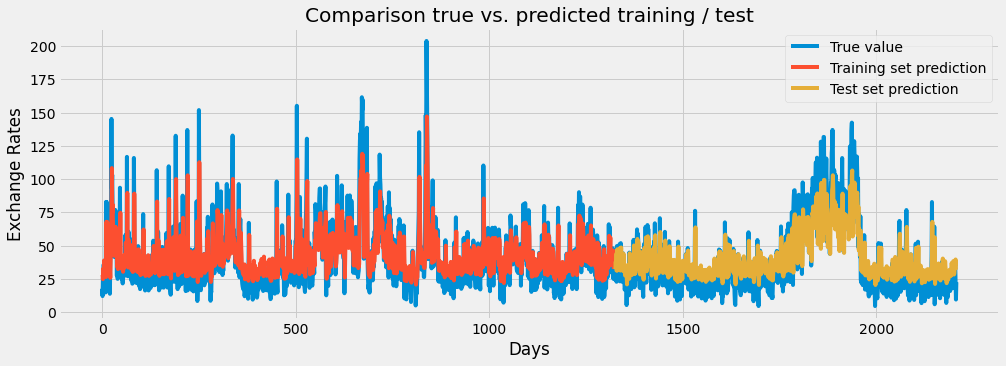

In [ ]:
# Öğrendiklerinini tahminletip ekliyoruz.
train_predict_plot = np.empty_like(dataset)
train_predict_plot[:, :] = np.nan
train_predict_plot[window_size:len(train_predict) + window_size, :] = train_predict
# Şimdi ise testleri tahminletiyoruz.
test_predict_plot = np.empty_like(dataset)
test_predict_plot[:, :] = np.nan
test_predict_plot[len(train_predict) + (window_size * 2) + 1:len(dataset) - 1, :] = test_predict
# Plot'u oluşturalım.
plt.figure(figsize = (15, 5))
plt.plot(scaler.inverse_transform(dataset), label = "True value")
plt.plot(train_predict_plot, label = "Training set prediction")
plt.plot(test_predict_plot, label = "Test set prediction")
plt.xlabel("veriler")
plt.ylabel("Exchange Rates")
plt.title("Comparison true vs. predicted training / test")
plt.legend()
plt.show()